In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
from torchvision import transforms
import time

In [2]:
# 绘图函数
import matplotlib.pyplot as plt
def draw_loss(train_loss, test_loss):
    x = np.linspace(0, len(train_loss), len(train_loss))
    plt.plot(x, train_loss, label="Train Loss", linewidth=1.5)
    plt.plot(x, test_loss, label="Test Loss", linewidth=1.5)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [3]:
# 生成回归任务数据集

# 设置随机种子
torch.manual_seed(1)
np.random.seed(1)

num_inputs = 500
num_examples = 10000
x_features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
y_labels = torch.mm(x_features,torch.ones(500,1)*0.0056) + 0.028
y_labels += torch.tensor(np.random.normal(0, 0.01, size=y_labels.size()), dtype=torch.float)
#训练集
train_features = x_features[:7000]
train_labels = y_labels[:7000]
#测试集
test_features = x_features[7000:]
test_labels = y_labels[7000:]

from torch.utils.data import TensorDataset, DataLoader
dataset_train = TensorDataset(train_features, train_labels)
dataset_test = TensorDataset(test_features , test_labels )
batch_size = 64
train_iter = DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True, num_workers=0)
test_iter = DataLoader(dataset=dataset_test , batch_size=batch_size, shuffle=True, num_workers=0)

In [4]:
class Net():
    def __init__(self):
        num_inputs, num_outputs, num_hiddens = indim, outdim, hiddendim
        W1 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_inputs)), dtype=torch.float)
        b1 = torch.zeros (1, dtype=torch.float)
        W2 = torch.tensor(np.random.normal(0, 0.01, (num_outputs, num_hiddens)), dtype=torch.float)
        b2 = torch.zeros (1, dtype=torch.float)
        # 求梯度
        self.params = [W1, b1, W2, b2]
        for param in self.params:
            param.requires_grad_(requires_grad = True)
        # 模型结构
        self.inputs_layer = lambda x: x.view(x.shape[0],-1)
        self.hiddens_layer = lambda x: self.my_ReLU(torch.matmul(x, W1.t())+ b1)
        self.outputs_layer = lambda x: torch.matmul(x, W2.t())+ b2
    @staticmethod
    def my_ReLU(x):
        return torch.max(input=x,other=torch.tensor(0.0))
    def forward(self, x):
        flatten_input = self.inputs_layer(x)
        hidden_output = self.hiddens_layer(flatten_input)
        final_output = self.outputs_layer(hidden_output)
        return final_output

In [5]:
# 优化器
def SGD (params,lr):
    for param in params:
        param.data-=lr*param.grad

In [6]:
# 测试函数
def test1(data_iter,net,loss_func) :
    test_loss_sum,c = 0.0,0
    for X, y in data_iter:
        result = net.forward(X)
        test_loss_sum+= loss_func(result, y).item()
        c +=1
    return test_loss_sum/c

In [7]:
# 训练函数
def train1(net, train_iter,loss_func, num_epochs,batch_size,lr=None,optimizer=None):
    train_loss_list = []
    test_loss_list = []
    for epoch in range(num_epochs):
        train_l_sum,train_acc_sum,n,c = 0.0,0.0,0,0
        for X,y in train_iter: 
            y_hat = net.forward(X)
            l=loss_func(y_hat, y)
            l.backward()
            optimizer(net.params, lr)
            for param in net.params:
                param.grad.data.zero_()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
            c += 1
        test_loss = test1(test_iter, net,loss_func)
        train_loss_list.append(train_l_sum/c)
        test_loss_list.append(test_loss)
        print('epoch %d, train_loss %.4f, test_loss %.4f' % (epoch+1, train_l_sum/c, test_loss))
    return train_loss_list,test_loss_list

epoch 1, train_loss 0.0159, test_loss 0.0152
epoch 2, train_loss 0.0150, test_loss 0.0145
epoch 3, train_loss 0.0142, test_loss 0.0138
epoch 4, train_loss 0.0134, test_loss 0.0130
epoch 5, train_loss 0.0125, test_loss 0.0121
epoch 6, train_loss 0.0113, test_loss 0.0110
epoch 7, train_loss 0.0101, test_loss 0.0097
epoch 8, train_loss 0.0086, test_loss 0.0083
epoch 9, train_loss 0.0071, test_loss 0.0068
epoch 10, train_loss 0.0056, test_loss 0.0055
epoch 11, train_loss 0.0043, test_loss 0.0042
epoch 12, train_loss 0.0032, test_loss 0.0032
epoch 13, train_loss 0.0024, test_loss 0.0024
epoch 14, train_loss 0.0018, test_loss 0.0019
epoch 15, train_loss 0.0014, test_loss 0.0015
epoch 16, train_loss 0.0011, test_loss 0.0013
epoch 17, train_loss 0.0009, test_loss 0.0011
epoch 18, train_loss 0.0008, test_loss 0.0009
epoch 19, train_loss 0.0007, test_loss 0.0008
epoch 20, train_loss 0.0006, test_loss 0.0008
time spend: 4.041433 second


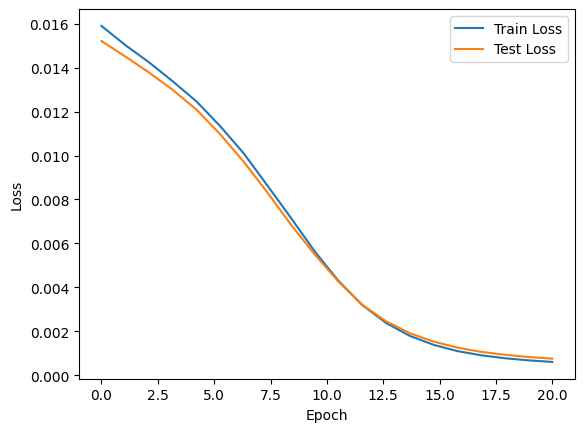

In [8]:
indim = 500
outdim = 1
hiddendim = 256
net = Net()
num_epochs = 20
lr = 0.01
loss_func = nn.MSELoss()
optimizer = SGD
time_start = time.time()
train_loss, test_loss = train1(net, train_iter, loss_func, num_epochs, batch_size, lr, optimizer)
time_end = time.time()
print("time spend: %.6f second" % (time_end - time_start))
draw_loss(train_loss,test_loss)

In [9]:
# 生成二分类数据集
 
num_inputs = 200
#1类
x1 = torch.normal(1,1,(10000, num_inputs))
y1 = torch.ones(10000,1)
x1_train = x1[:7000]
x1_test  = x1[7000:]
#0类
x2 = torch.normal(-1,1,(10000, num_inputs))
y2 = torch.zeros(10000,1)
x2_train = x2[:7000]
x2_test = x2[7000:]
 
# 合并训练集
train_features = torch.cat((x1_train,x2_train), 0).type(torch.FloatTensor)
train_labels = torch.cat((y1[:7000], y2[:7000]), 0).type(torch.FloatTensor)
# 合并测试集
test_features = torch.cat((x1_test,x2_test), 0).type(torch.FloatTensor)
test_labels = torch.cat((y1[7000:], y2[7000:]), 0).type(torch.FloatTensor)

dataset_train = TensorDataset(train_features, train_labels)
dataset_test = TensorDataset(test_features , test_labels )
batch_size = 128
train_iter = DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True, num_workers=0)
test_iter = DataLoader(dataset=dataset_test , batch_size=batch_size, shuffle=True, num_workers=0)

In [10]:
# 评价函数
def test2(data_iter, model, loss_func):
    acc_sum, test_l_sum, n, c = 0.0, 0.0, 0, 0
    for X, y in data_iter:
        result = model.forward(X)
        y_pred = (result > 0.5).float() # convert to binary
        acc_sum += (y_pred == y).float().sum().item()
        test_l_sum += loss_func(result, y).item()
        n += y.shape[0]
        c += 1
    return acc_sum / n, test_l_sum / c

In [11]:
# 训练函数
def train2(net, train_iter,loss_func, num_epochs,batch_size,lr=None,optimizer=None):
    train_loss_list = []
    test_loss_list = []
    for epoch in range(num_epochs):
        train_l_sum,train_acc_sum,n,c = 0.0,0.0,0,0
        for X,y in train_iter: 
            y_hat = net.forward(X)
            l=loss_func(y_hat, y)
            l.backward()
            optimizer(net.params, lr)
            for param in net.params:
                param.grad.data.zero_()
            train_l_sum += l.item()
            y_pred = (y_hat > 0.5).float() # convert to binary
            train_acc_sum += (y_pred == y).float().sum().item()
            n += y.shape[0]
            c += 1
        test_acc, test_loss = test2(test_iter, net,loss_func)
        train_loss_list.append(train_l_sum/c)
        test_loss_list.append(test_loss)
        print('epoch %d, train_loss %.4f, test_loss %.4f, train_acc %.3f, test_acc %.3f' % (epoch+1, train_l_sum/c, test_loss, train_acc_sum/n, test_acc))
    return train_loss_list,test_loss_list

epoch 1, train_loss 0.6813, test_loss 0.6637, train_acc 0.500, test_acc 0.500
epoch 2, train_loss 0.6404, test_loss 0.6110, train_acc 0.500, test_acc 0.500
epoch 3, train_loss 0.5684, test_loss 0.5163, train_acc 0.500, test_acc 0.500
epoch 4, train_loss 0.4515, test_loss 0.3808, train_acc 0.799, test_acc 1.000
epoch 5, train_loss 0.3132, test_loss 0.2489, train_acc 1.000, test_acc 1.000
epoch 6, train_loss 0.2002, test_loss 0.1577, train_acc 1.000, test_acc 1.000
epoch 7, train_loss 0.1288, test_loss 0.1041, train_acc 1.000, test_acc 1.000
epoch 8, train_loss 0.0875, test_loss 0.0730, train_acc 1.000, test_acc 1.000
epoch 9, train_loss 0.0631, test_loss 0.0542, train_acc 1.000, test_acc 1.000
epoch 10, train_loss 0.0478, test_loss 0.0420, train_acc 1.000, test_acc 1.000
epoch 11, train_loss 0.0377, test_loss 0.0337, train_acc 1.000, test_acc 1.000
epoch 12, train_loss 0.0308, test_loss 0.0279, train_acc 1.000, test_acc 1.000
epoch 13, train_loss 0.0257, test_loss 0.0235, train_acc 1.00

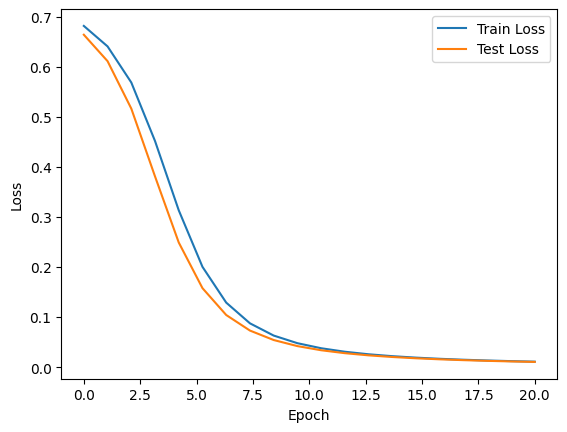

In [12]:
indim = 200
outdim = 1
hiddendim = 128
net = Net()
num_epochs = 20
lr = 0.001
loss_func = nn.BCEWithLogitsLoss()
optimizer = SGD
time_start = time.time()
train_loss, test_loss = train2(net, train_iter, loss_func, num_epochs, batch_size, lr, optimizer)
time_end = time.time()
print("time spend: %.6f second" % (time_end - time_start))
draw_loss(train_loss,test_loss)

In [13]:
# minist数据集
mnist_train = torchvision.datasets.MNIST(root='~/Datasets/MNIST',train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='~/Datasets/MNIST',train=False, transform=transforms.ToTensor())
 
# 通过DataLoader 读取小批量数据样本
batch_size = 32
train_iter = DataLoader(mnist_train, batch_size=batch_size, shuffle=True,num_workers=0)
test_iter = DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=0)

In [14]:
# 评价函数
def evaluate_accuracy(data_iter, model, loss_func):
    acc_sum, test_l_sum, n, c = 0.0, 0.0, 0, 0
    for X, y in data_iter:
        result = model.forward(X)
        acc_sum += (result.argmax(dim=1) == y).float().sum().item()
        test_l_sum += loss_func(result, y).item()
        n += y.shape[0]
        c += 1
    return acc_sum / n, test_l_sum / c

In [15]:
# 训练函数
def train3(net, train_iter,loss_func, num_epochs,batch_size,lr=None,optimizer=None):
    train_loss_list = []
    test_loss_list = []
    for epoch in range(num_epochs):
        train_l_sum,train_acc_sum,n,c = 0.0,0.0,0,0
        for X,y in train_iter: 
            y_hat = net.forward(X)
            l=loss_func(y_hat, y)
            l.backward()
            optimizer(net.params, lr)
            for param in net.params:
                param.grad.data.zero_()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
            c += 1
        test_acc, test_loss = evaluate_accuracy(test_iter, net,loss_func)
        train_loss_list.append(train_l_sum/c)
        test_loss_list.append(test_loss)
        print('epoch %d, train_loss %.4f, test_loss %.4f, train_acc %.3f, test_acc %.3f' % (epoch+1, train_l_sum/c, test_loss, train_acc_sum/n, test_acc))
    return train_loss_list,test_loss_list

epoch 1, train_loss 1.1029, test_loss 0.4517, train_acc 0.734, test_acc 0.882
epoch 2, train_loss 0.4036, test_loss 0.3436, train_acc 0.888, test_acc 0.900
epoch 3, train_loss 0.3409, test_loss 0.3092, train_acc 0.902, test_acc 0.912
epoch 4, train_loss 0.3127, test_loss 0.2891, train_acc 0.910, test_acc 0.918
epoch 5, train_loss 0.2922, test_loss 0.2741, train_acc 0.917, test_acc 0.923
epoch 6, train_loss 0.2745, test_loss 0.2570, train_acc 0.921, test_acc 0.927
epoch 7, train_loss 0.2578, test_loss 0.2421, train_acc 0.926, test_acc 0.932
epoch 8, train_loss 0.2415, test_loss 0.2285, train_acc 0.932, test_acc 0.936
epoch 9, train_loss 0.2267, test_loss 0.2149, train_acc 0.936, test_acc 0.939
epoch 10, train_loss 0.2131, test_loss 0.2030, train_acc 0.940, test_acc 0.942
epoch 11, train_loss 0.2006, test_loss 0.1921, train_acc 0.944, test_acc 0.943
epoch 12, train_loss 0.1893, test_loss 0.1814, train_acc 0.946, test_acc 0.948
epoch 13, train_loss 0.1788, test_loss 0.1724, train_acc 0.95

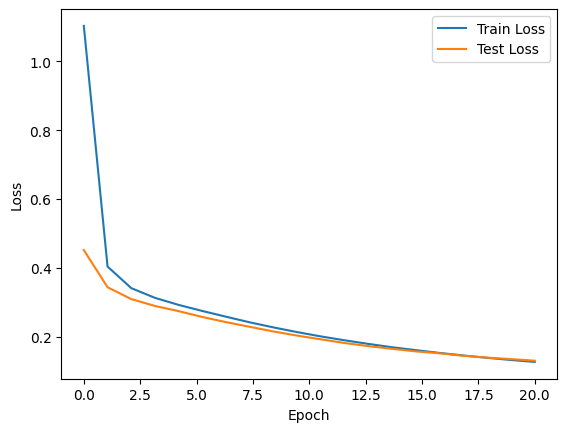

In [16]:
indim = 784
outdim = 10
hiddendim = 256
net = Net()
num_epochs = 20
lr = 0.01
loss_func = nn.CrossEntropyLoss()
optimizer = SGD
time_start = time.time()
train_loss, test_loss = train3(net, train_iter, loss_func, num_epochs, batch_size, lr, optimizer)
time_end = time.time()
print("time spend: %.6f second" % (time_end - time_start))
draw_loss(train_loss,test_loss)